In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [64]:
train = pd.read_csv("train.csv")
pd.set_option("display.max_columns",None) #showing all the columns

In [65]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
train.info() #info of dtypes and non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [67]:
train = train.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1) #dropping columns with a lot of null entries

In [68]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

**Find the correlated columns with SalePrice**

In [69]:
# creating dataframe with columns and correlations with SalePrice
fltr = pd.DataFrame(train.corrwith(train['SalePrice']),columns =["correlation"]).reset_index()

In [70]:
# filter correlation which is higher than 0.50 and lower than -0.50
fltr = fltr[(fltr["correlation"] >= 0.50)  | (fltr["correlation"] < -0.50)]
fltr

,index,correlation
4,OverallQual,0.790982
6,YearBuilt,0.522897
7,YearRemodAdd,0.507101
12,TotalBsmtSF,0.613581
13,1stFlrSF,0.605852
16,GrLivArea,0.708624
19,FullBath,0.560664
23,TotRmsAbvGrd,0.533723
26,GarageCars,0.640409
27,GarageArea,0.623431


In [71]:
correlated_columns = fltr["index"].tolist() # list the correlated columns

In [72]:
print(correlated_columns)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


**Find the Binary Columns**

In [126]:
# get the numeric columns 
numeric_columns = train.select_dtypes(include=np.number).columns.tolist()


In [74]:
# create df called train_numeric only with numeric values
train_numeric = train[numeric_columns]

In [75]:
# find the binary columns
binary= train_numeric.max() - train_numeric.min()
binary[binary==1] # there is no binary columns that max-min=0

Series([], dtype: float64)

In [127]:
# checking of objects to find binary values
binary_object = train.loc[:, train.nunique() == 2].columns.to_list()
binary_object

['Street', 'Utilities', 'CentralAir']

**Find the Categorical/Object Columns**

In [77]:
# list the columns of train df and numeric columns and extract numeric_columns fron the train.columns
object_columns = list(set(train.columns) - set(numeric_columns))

In [78]:
train[object_columns].head() # only with object data

,Neighborhood,LotConfig,LandContour,BsmtFinType2,BsmtExposure,GarageQual,BldgType,ExterQual,Foundation,Exterior1st,LotShape,RoofMatl,Heating,Exterior2nd,Condition1,SaleType,CentralAir,Condition2,SaleCondition,ExterCond,MasVnrType,LandSlope,HouseStyle,GarageType,GarageFinish,RoofStyle,Functional,BsmtQual,Electrical,BsmtCond,GarageCond,KitchenQual,BsmtFinType1,MSZoning,Utilities,PavedDrive,HeatingQC,Street
0,CollgCr,Inside,Lvl,Unf,No,TA,1Fam,Gd,PConc,VinylSd,Reg,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,BrkFace,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave
1,Veenker,FR2,Lvl,Unf,Gd,TA,1Fam,TA,CBlock,MetalSd,Reg,CompShg,GasA,MetalSd,Feedr,WD,Y,Norm,Normal,TA,None,Gtl,1Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,TA,ALQ,RL,AllPub,Y,Ex,Pave
2,CollgCr,Inside,Lvl,Unf,Mn,TA,1Fam,Gd,PConc,VinylSd,IR1,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,BrkFace,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave
3,Crawfor,Corner,Lvl,Unf,No,TA,1Fam,TA,BrkTil,Wd Sdng,IR1,CompShg,GasA,Wd Shng,Norm,WD,Y,Norm,Abnorml,TA,None,Gtl,2Story,Detchd,Unf,Gable,Typ,TA,SBrkr,Gd,TA,Gd,ALQ,RL,AllPub,Y,Gd,Pave
4,NoRidge,FR2,Lvl,Unf,Av,TA,1Fam,Gd,PConc,VinylSd,IR1,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,BrkFace,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave


In [79]:
correlated_columns.extend(object_columns) # add the object_columns into correlated columns to create filtered dataset

In [80]:
len(correlated_columns)

49

**Filtered Dataset**

In [81]:
train2 = train[correlated_columns]

In [82]:
train2

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,Neighborhood,LotConfig,LandContour,BsmtFinType2,BsmtExposure,GarageQual,BldgType,ExterQual,Foundation,Exterior1st,LotShape,RoofMatl,Heating,Exterior2nd,Condition1,SaleType,CentralAir,Condition2,SaleCondition,ExterCond,MasVnrType,LandSlope,HouseStyle,GarageType,GarageFinish,RoofStyle,Functional,BsmtQual,Electrical,BsmtCond,GarageCond,KitchenQual,BsmtFinType1,MSZoning,Utilities,PavedDrive,HeatingQC,Street
0,7,2003,2003,856,856,1710,2,8,2,548,208500,CollgCr,Inside,Lvl,Unf,No,TA,1Fam,Gd,PConc,VinylSd,Reg,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,BrkFace,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,Veenker,FR2,Lvl,Unf,Gd,TA,1Fam,TA,CBlock,MetalSd,Reg,CompShg,GasA,MetalSd,Feedr,WD,Y,Norm,Normal,TA,None,Gtl,1Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,TA,ALQ,RL,AllPub,Y,Ex,Pave
2,7,2001,2002,920,920,1786,2,6,2,608,223500,CollgCr,Inside,Lvl,Unf,Mn,TA,1Fam,Gd,PConc,VinylSd,IR1,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,BrkFace,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave
3,7,1915,1970,756,961,1717,1,7,3,642,140000,Crawfor,Corner,Lvl,Unf,No,TA,1Fam,TA,BrkTil,Wd Sdng,IR1,CompShg,GasA,Wd Shng,Norm,WD,Y,Norm,Abnorml,TA,None,Gtl,2Story,Detchd,Unf,Gable,Typ,TA,SBrkr,Gd,TA,Gd,ALQ,RL,AllPub,Y,Gd,Pave
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,NoRidge,FR2,Lvl,Unf,Av,TA,1Fam,Gd,PConc,VinylSd,IR1,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,BrkFace,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,Gilbert,Inside,Lvl,Unf,No,TA,1Fam,TA,PConc,VinylSd,Reg,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,None,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,TA,Unf,RL,AllPub,Y,Ex,Pave
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,NWAmes,Inside,Lvl,Rec,No,TA,1Fam,TA,CBlock,Plywood,Reg,CompShg,GasA,Plywood,Norm,WD,Y,Norm,Normal,TA,Stone,Gtl,1Story,Attchd,Unf,Gable,Min1,Gd,SBrkr,TA,TA,TA,ALQ,RL,AllPub,Y,TA,Pave
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,Crawfor,Inside,Lvl,Unf,No,TA,1Fam,Ex,Stone,CemntBd,Reg,CompShg,GasA,CmentBd,Norm,WD,Y,Norm,Normal,Gd,None,Gtl,2Story,Attchd,RFn,Gable,Typ,TA,SBrkr,Gd,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,NAmes,Inside,Lvl,Rec,Mn,TA,1Fam,TA,CBlock,MetalSd,Reg,CompShg,GasA,MetalSd,Norm,WD,Y,Norm,Normal,TA,None,Gtl,1Story,Attchd,Unf,Hip,Typ,TA,FuseA,TA,TA,Gd,GLQ,RL,AllPub,Y,Gd,Pave


In [83]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OverallQual    1460 non-null   int64 
 1   YearBuilt      1460 non-null   int64 
 2   YearRemodAdd   1460 non-null   int64 
 3   TotalBsmtSF    1460 non-null   int64 
 4   1stFlrSF       1460 non-null   int64 
 5   GrLivArea      1460 non-null   int64 
 6   FullBath       1460 non-null   int64 
 7   TotRmsAbvGrd   1460 non-null   int64 
 8   GarageCars     1460 non-null   int64 
 9   GarageArea     1460 non-null   int64 
 10  SalePrice      1460 non-null   int64 
 11  Neighborhood   1460 non-null   object
 12  LotConfig      1460 non-null   object
 13  LandContour    1460 non-null   object
 14  BsmtFinType2   1422 non-null   object
 15  BsmtExposure   1422 non-null   object
 16  GarageQual     1379 non-null   object
 17  BldgType       1460 non-null   object
 18  ExterQual      1460 non-null

In [84]:
train2.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,Neighborhood,LotConfig,LandContour,BsmtFinType2,BsmtExposure,GarageQual,BldgType,ExterQual,Foundation,Exterior1st,LotShape,RoofMatl,Heating,Exterior2nd,Condition1,SaleType,CentralAir,Condition2,SaleCondition,ExterCond,MasVnrType,LandSlope,HouseStyle,GarageType,GarageFinish,RoofStyle,Functional,BsmtQual,Electrical,BsmtCond,GarageCond,KitchenQual,BsmtFinType1,MSZoning,Utilities,PavedDrive,HeatingQC,Street
0,7,2003,2003,856,856,1710,2,8,2,548,208500,CollgCr,Inside,Lvl,Unf,No,TA,1Fam,Gd,PConc,VinylSd,Reg,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,BrkFace,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,Veenker,FR2,Lvl,Unf,Gd,TA,1Fam,TA,CBlock,MetalSd,Reg,CompShg,GasA,MetalSd,Feedr,WD,Y,Norm,Normal,TA,None,Gtl,1Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,TA,ALQ,RL,AllPub,Y,Ex,Pave
2,7,2001,2002,920,920,1786,2,6,2,608,223500,CollgCr,Inside,Lvl,Unf,Mn,TA,1Fam,Gd,PConc,VinylSd,IR1,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,BrkFace,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave
3,7,1915,1970,756,961,1717,1,7,3,642,140000,Crawfor,Corner,Lvl,Unf,No,TA,1Fam,TA,BrkTil,Wd Sdng,IR1,CompShg,GasA,Wd Shng,Norm,WD,Y,Norm,Abnorml,TA,None,Gtl,2Story,Detchd,Unf,Gable,Typ,TA,SBrkr,Gd,TA,Gd,ALQ,RL,AllPub,Y,Gd,Pave
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,NoRidge,FR2,Lvl,Unf,Av,TA,1Fam,Gd,PConc,VinylSd,IR1,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,BrkFace,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave


**Heat Map and Pairplot**

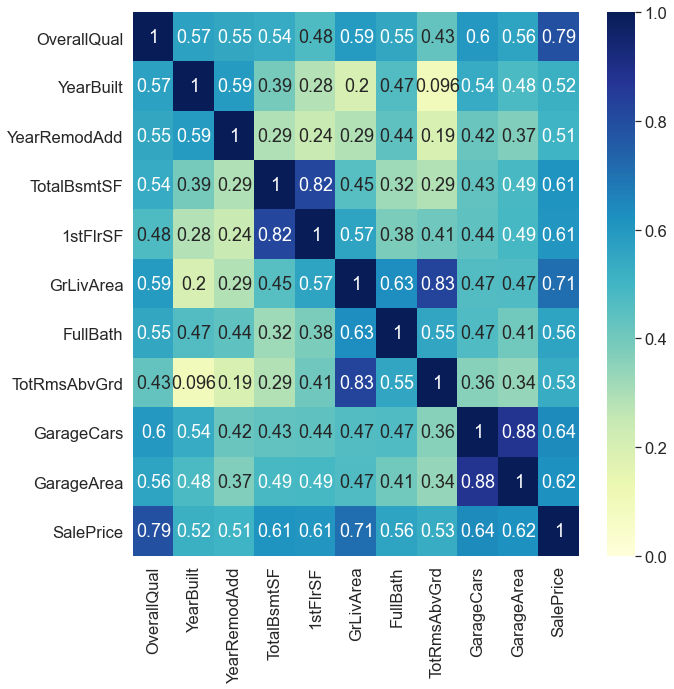

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(train2.corr(),vmin=0,vmax=1,annot=True,cmap="YlGnBu")
plt.show()

**1stFlrSF:** First Floor square feet

**FullBath:** Full bathrooms above grade

**GarageArea:** Size of garage in square feet

**Garage Cars:** Size of garage in car capacity

**GrLivArea:** Above grade (ground) living area square feet

**OveralQual:** Rates the overall material and finish of the house

**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)

**YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions)

**TotalBsmtSF:** Total square feet of basement area

**OLS vol.1**

In [86]:
Y = train2['SalePrice']
X = train2['OverallQual']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):          2.19e-313
Time:                        11:51:48   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      

very high standard errors

coefficients and confidence intervals have scientific notations

**Data Visualization**

**Scatter Plots**

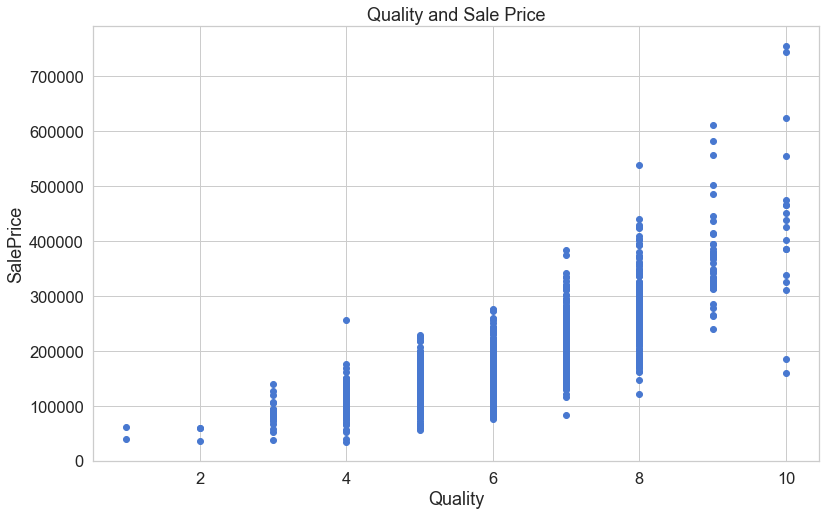

In [87]:
plt.figure(figsize=(13,8))
plt.scatter(train2["OverallQual"],train2["SalePrice"])
plt.xlabel("Quality")
plt.ylabel("SalePrice")
plt.title('Quality and Sale Price')
plt.show()

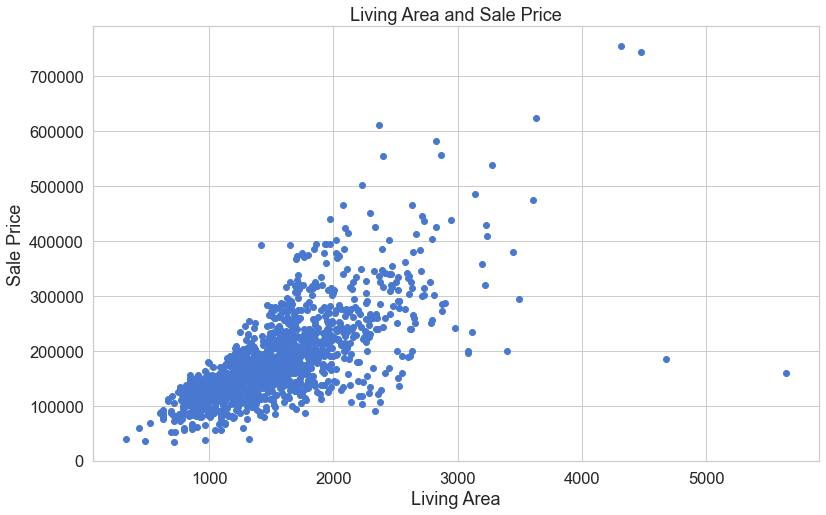

In [88]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
plt.figure(figsize=(13,8))
plt.scatter(train2["GrLivArea"],train2["SalePrice"])
plt.xlabel("Living Area")
plt.ylabel("Sale Price")
plt.title('Living Area and Sale Price')
plt.show()
# some outliers both in terms of the price and also living Area

**Bar Plot**

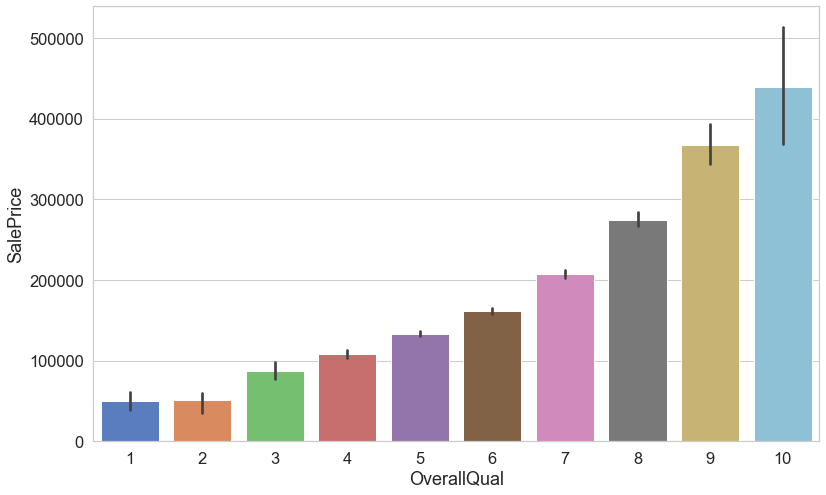

In [89]:
plt.figure(figsize=(13,8))
sns.barplot(x="OverallQual",y="SalePrice",data=train2)
plt.show()
#confidence interval default is 95
#larger error bar means larger spread, data are more variable from the mean

**Box Plot**

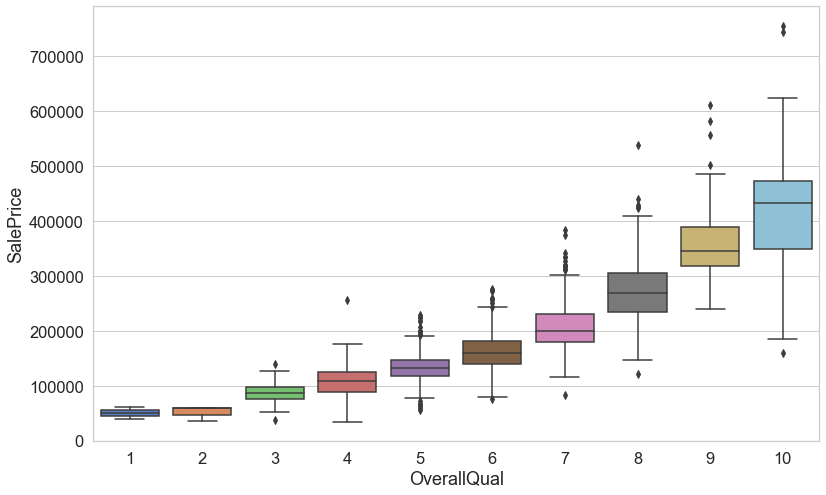

In [90]:
plt.figure(figsize=(13,8))
sns.boxplot(x="OverallQual",y="SalePrice",data=train2)
plt.show()
# again shows the outlier the interquartile range is larger on quality level 10

**Exploring our Dependent/Target Variable**

In [91]:
train2["SalePrice"].describe()
# standard deviation is high so there are a lot of values which are not near to mean
# max-min is too high

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Histogram**

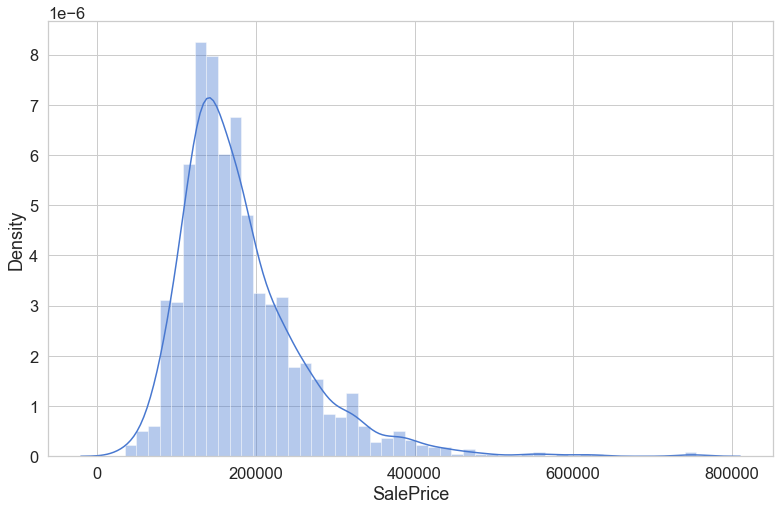

In [92]:
plt.figure(figsize=(13,8))
sns.distplot(train2["SalePrice"])
plt.show()
# Most of the density lies between 100k and 250k
# but there are also expensive outliers
# right skewed data shows there are minority of very large values
# won't be successful to predict the expensive houses

**Normalize the Skewed Data**

In [93]:
np.log(np.e)
# the power to which e would have to be raised to equal x
# natural algorithm
# The log function deemphasizes very large values
# and the function makes them closer into the center of the distribution making it look more like a Normal distribution
# only for the right-skewed

1.0

In [94]:
print('Max: ',np.log(train2['SalePrice'].max()))
print('Min: ',np.log(train2['SalePrice'].min()))

Max:  13.534473028231162
Min:  10.460242108190519


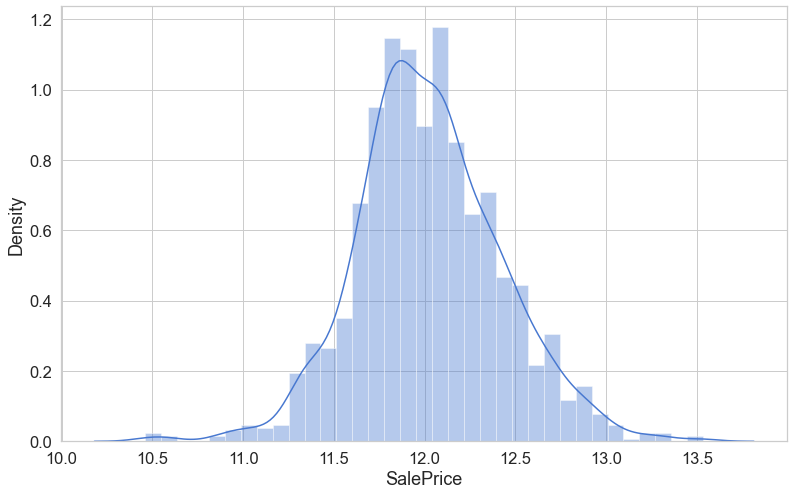

In [95]:
plt.figure(figsize=(13,8))
sns.distplot(np.log(train["SalePrice"]))
plt.show()

**OLS vol.2**

In [96]:
Y = np.log(train2["SalePrice"])
X = train2['OverallQual']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     2931.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:51:49   Log-Likelihood:                 73.088
No. Observations:                1460   AIC:                            -142.2
Df Residuals:                    1458   BIC:                            -131.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5844      0.027    388.183      

Sale Price = 10.5844 + 0.2360*Overal Quality (log)

standard error is lower

R-Squared is closer to 1

confidence interval is narrow between 0.227 - 0.245

0.2360 - 1.96*0.004 = 0.227

0.2360 + 1.96*0.004 = 0.245

In [97]:
Y_pred = results.predict(X)
residuals = Y_pred - Y

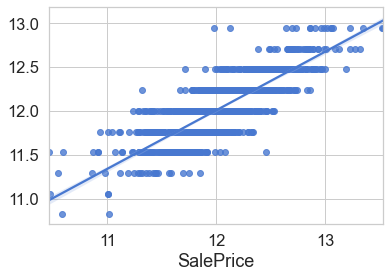

In [98]:
sns.regplot(Y,Y_pred)
plt.show()

In [99]:
residuals = Y_pred - Y

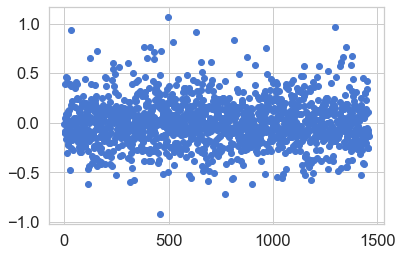

In [100]:
plt.plot(residuals,"o")
plt.show()

In [101]:
# sum of residuals is close to 0
print(format(residuals.sum(), '.15f'))

-0.000000000020028


**OLS vol.3**

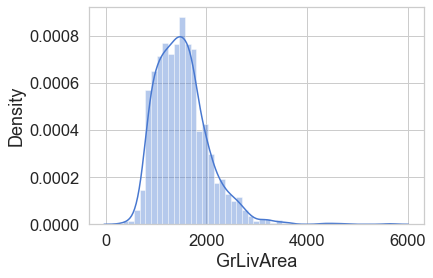

In [102]:
sns.distplot(train2['GrLivArea'])
plt.show()

In [103]:
train3 = train2[["SalePrice",'OverallQual']]

In [104]:
train3['GrLivArea'] = np.log(train2['GrLivArea'])

In [105]:
Y = np.log(train2["SalePrice"])
X = train3[["OverallQual",'GrLivArea']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     2203.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:51:50   Log-Likelihood:                 285.05
No. Observations:                1460   AIC:                            -564.1
Df Residuals:                    1457   BIC:                            -548.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.7899      0.128     60.708      

Adj-R squared increased

Sale Price = 7.78 + 0.1710 * OverallQual + 0.4309 * GrLivArea

In [106]:
Y_pred = results.predict(X)
residuals = Y - Y_pred

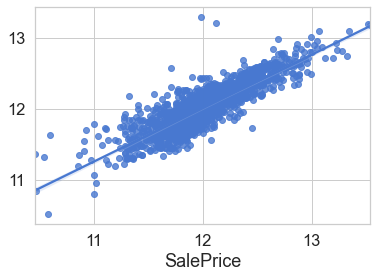

In [107]:
sns.regplot(Y,Y_pred)
plt.show()

In [108]:
print(format(residuals.sum(), '.15f'))

-0.000000000006118


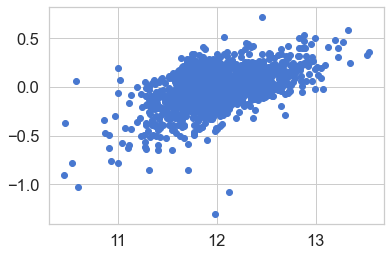

In [109]:
plt.plot(Y, residuals, 'o')
plt.show()

**Finding the Categorical Variable**

In [110]:
train[object_columns]

,Neighborhood,LotConfig,LandContour,BsmtFinType2,BsmtExposure,GarageQual,BldgType,ExterQual,Foundation,Exterior1st,LotShape,RoofMatl,Heating,Exterior2nd,Condition1,SaleType,CentralAir,Condition2,SaleCondition,ExterCond,MasVnrType,LandSlope,HouseStyle,GarageType,GarageFinish,RoofStyle,Functional,BsmtQual,Electrical,BsmtCond,GarageCond,KitchenQual,BsmtFinType1,MSZoning,Utilities,PavedDrive,HeatingQC,Street
0,CollgCr,Inside,Lvl,Unf,No,TA,1Fam,Gd,PConc,VinylSd,Reg,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,BrkFace,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave
1,Veenker,FR2,Lvl,Unf,Gd,TA,1Fam,TA,CBlock,MetalSd,Reg,CompShg,GasA,MetalSd,Feedr,WD,Y,Norm,Normal,TA,None,Gtl,1Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,TA,ALQ,RL,AllPub,Y,Ex,Pave
2,CollgCr,Inside,Lvl,Unf,Mn,TA,1Fam,Gd,PConc,VinylSd,IR1,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,BrkFace,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave
3,Crawfor,Corner,Lvl,Unf,No,TA,1Fam,TA,BrkTil,Wd Sdng,IR1,CompShg,GasA,Wd Shng,Norm,WD,Y,Norm,Abnorml,TA,None,Gtl,2Story,Detchd,Unf,Gable,Typ,TA,SBrkr,Gd,TA,Gd,ALQ,RL,AllPub,Y,Gd,Pave
4,NoRidge,FR2,Lvl,Unf,Av,TA,1Fam,Gd,PConc,VinylSd,IR1,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,BrkFace,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,Inside,Lvl,Unf,No,TA,1Fam,TA,PConc,VinylSd,Reg,CompShg,GasA,VinylSd,Norm,WD,Y,Norm,Normal,TA,None,Gtl,2Story,Attchd,RFn,Gable,Typ,Gd,SBrkr,TA,TA,TA,Unf,RL,AllPub,Y,Ex,Pave
1456,NWAmes,Inside,Lvl,Rec,No,TA,1Fam,TA,CBlock,Plywood,Reg,CompShg,GasA,Plywood,Norm,WD,Y,Norm,Normal,TA,Stone,Gtl,1Story,Attchd,Unf,Gable,Min1,Gd,SBrkr,TA,TA,TA,ALQ,RL,AllPub,Y,TA,Pave
1457,Crawfor,Inside,Lvl,Unf,No,TA,1Fam,Ex,Stone,CemntBd,Reg,CompShg,GasA,CmentBd,Norm,WD,Y,Norm,Normal,Gd,None,Gtl,2Story,Attchd,RFn,Gable,Typ,TA,SBrkr,Gd,TA,Gd,GLQ,RL,AllPub,Y,Ex,Pave
1458,NAmes,Inside,Lvl,Rec,Mn,TA,1Fam,TA,CBlock,MetalSd,Reg,CompShg,GasA,MetalSd,Norm,WD,Y,Norm,Normal,TA,None,Gtl,1Story,Attchd,Unf,Hip,Typ,TA,FuseA,TA,TA,Gd,GLQ,RL,AllPub,Y,Gd,Pave


In [111]:
binary_object

['Street', 'Utilities', 'CentralAir']

In [112]:
def value(col,df=train2):
    return train2[col].value_counts()

In [113]:
value("GarageFinish")

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [114]:
train2.shape[0] - value("GarageFinish").sum()

81

In [115]:
# null values mean no Garage
train2["GarageFinish"] = np.where(train2["GarageFinish"].isnull(),"NG",train2["GarageFinish"])

In [116]:
train4 = train2[["OverallQual","GarageFinish","SalePrice","GrLivArea"]]

In [117]:
train4["log_livarea"] = np.log(train4["GrLivArea"])
train4.head()

,OverallQual,GarageFinish,SalePrice,GrLivArea,log_livarea
0,7,RFn,208500,1710,7.444249
1,6,RFn,181500,1262,7.140453
2,7,RFn,223500,1786,7.487734
3,7,Unf,140000,1717,7.448334
4,8,RFn,250000,2198,7.695303


In [118]:
train4 = pd.get_dummies(train4, columns=['GarageFinish']) #getting dummies

In [119]:
train4.head()

,OverallQual,SalePrice,GrLivArea,log_livarea,GarageFinish_Fin,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf
0,7,208500,1710,7.444249,0,0,1,0
1,6,181500,1262,7.140453,0,0,1,0
2,7,223500,1786,7.487734,0,0,1,0
3,7,140000,1717,7.448334,0,0,0,1
4,8,250000,2198,7.695303,0,0,1,0


**OLS vol.4**

In [120]:
X = train4[["OverallQual","log_livarea","GarageFinish_RFn","GarageFinish_Unf","GarageFinish_NG"]]
Y = np.log(train4["SalePrice"])
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1037.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:51:51   Log-Likelihood:                 377.40
No. Observations:                1460   AIC:                            -742.8
Df Residuals:                    1454   BIC:                            -711.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.1861      0.125  

std.errors are low

Adj R.squared got a little bit bigger

T-values are negative for categorical varibles of Garage

P value is higher than 5% for GarageFinish_RFn

**Fin:** Finished

**RFn:** Rough Finished	

**Unf:** Unfinished

**NG:** No Garage

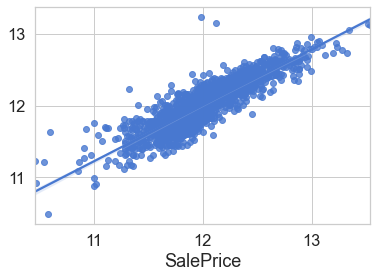

In [121]:
Y_pred = results.predict(X)
residuals = Y - Y_pred
sns.regplot(Y,Y_pred)
plt.show()

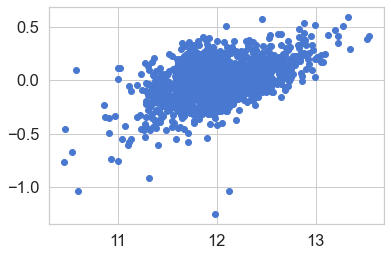

In [122]:
plt.plot(Y, residuals, 'o')
plt.show()

In [123]:
print(format(residuals.sum(), '.15f'))

-0.000000000009800


In [124]:
#questions:
# how to linear regression with ordinal data? Overall Quality is actually an ordinal data so are we still dropping something?
# if so, the sum does not make 1?
# can we also take natural logarithmic of our independet variable?
# how to decide on categorical variable? it cannot be the same amount of value counts all the time what do we do in this case?
# what are the methods there to normalize the categorical variable?
# what does low t-value mean?